In [35]:
import matplotlib.pyplot as plt
import numpy as np


In [36]:
m=0.7
c=0.3

X=np.arange(0,1,0.02)
y=m*X+c

print(f"Shape of X={X.shape}")
print(f"Shape of y={y.shape}")

Shape of X=(50,)
Shape of y=(50,)


In [37]:
split=int(len(X)*0.8)
X_train,y_train=X[:split], y[:split]
X_test, y_test=X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(40,) (40,)
(10,) (10,)


In [38]:
def plot_data(X_train=X_train, y_train=y_train, X_test = X_test, y_test = y_test, predictions=None):

    plt.figure(figsize=(8,6))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('X vs Y')
    plt.scatter(X_train, y_train, c='b', s=8, label='Training Data')
    plt.scatter(X_test, y_test, c='r', s=8, label='Testing Data')
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=8, label='Predicted Data')

    plt.legend()

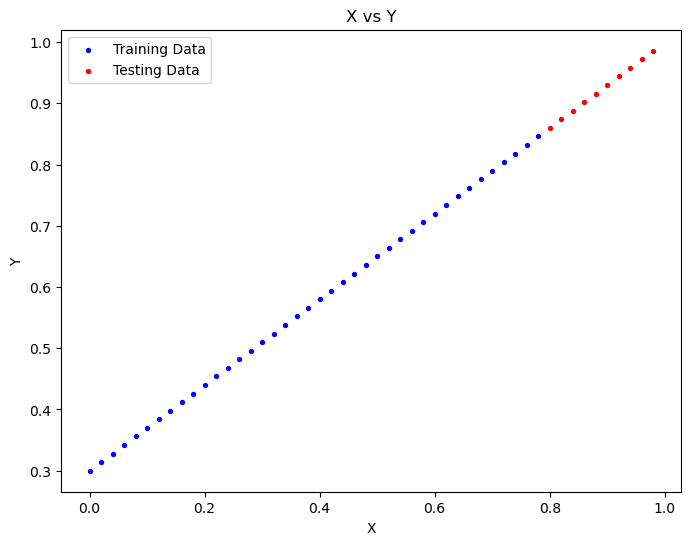

In [39]:
plot_data()

In [40]:
W=np.random.rand(1)
b=np.random.rand(1)
print(W,b)

[0.67389287] [0.08028652]


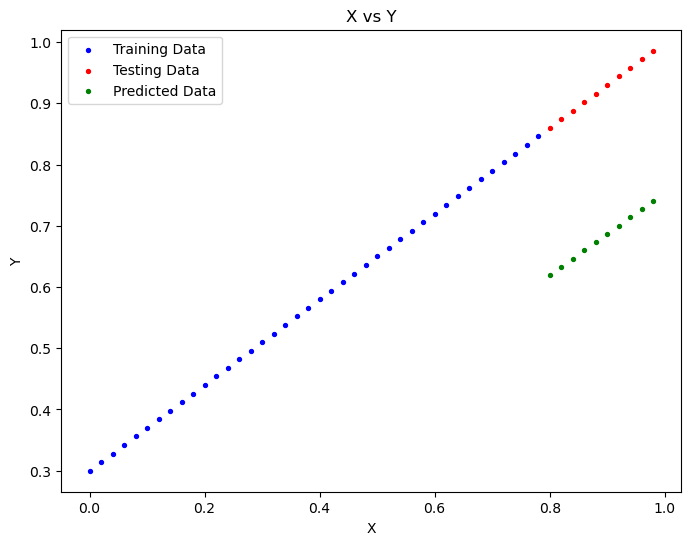

In [41]:
y_out= W * X_test + b
plot_data(predictions=y_out)

In [42]:
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred))/len(y_true)
    

In [43]:
# Building the training loop
epochs=500
alpha=0.1
trainLossList=[]
testLossList=[]
for epoch in range(epochs):
    #Forward Pass
    y_pred=X_train*W+b
    
    #compute Train Loss
    train_loss=loss_fn(y_true=y_train, y_pred=y_pred)
    trainLossList.append(train_loss)

    
    #Compute the gradient

    gradientW=(-2*np.sum((y_train-y_pred)*X_train))/len(y_train)
    gradientb=(-2*np.sum(y_train-y_pred))/len(y_train)

    
    #Backpropagate
    
    W=W-alpha*gradientW
    b=b-alpha*gradientb

    
    #Compute Test loss
    test_pred=X_test*W+b
    test_loss=loss_fn(y_true=y_test, y_pred=test_pred)
    testLossList.append(test_loss)
    
    if(epoch%10==0):
        print(f"Epoch: {epoch} | Train Loss:{train_loss:.5f} | Test Loss:{test_loss:.5f}")

Epoch: 0 | Train Loss:0.05289 | Test Loss:0.03268
Epoch: 10 | Train Loss:0.00040 | Test Loss:0.00009
Epoch: 20 | Train Loss:0.00011 | Test Loss:0.00043
Epoch: 30 | Train Loss:0.00009 | Test Loss:0.00039
Epoch: 40 | Train Loss:0.00008 | Test Loss:0.00033
Epoch: 50 | Train Loss:0.00006 | Test Loss:0.00027
Epoch: 60 | Train Loss:0.00005 | Test Loss:0.00023
Epoch: 70 | Train Loss:0.00004 | Test Loss:0.00019
Epoch: 80 | Train Loss:0.00004 | Test Loss:0.00016
Epoch: 90 | Train Loss:0.00003 | Test Loss:0.00013
Epoch: 100 | Train Loss:0.00003 | Test Loss:0.00011
Epoch: 110 | Train Loss:0.00002 | Test Loss:0.00009
Epoch: 120 | Train Loss:0.00002 | Test Loss:0.00007
Epoch: 130 | Train Loss:0.00001 | Test Loss:0.00006
Epoch: 140 | Train Loss:0.00001 | Test Loss:0.00005
Epoch: 150 | Train Loss:0.00001 | Test Loss:0.00004
Epoch: 160 | Train Loss:0.00001 | Test Loss:0.00004
Epoch: 170 | Train Loss:0.00001 | Test Loss:0.00003
Epoch: 180 | Train Loss:0.00001 | Test Loss:0.00002
Epoch: 190 | Train Loss

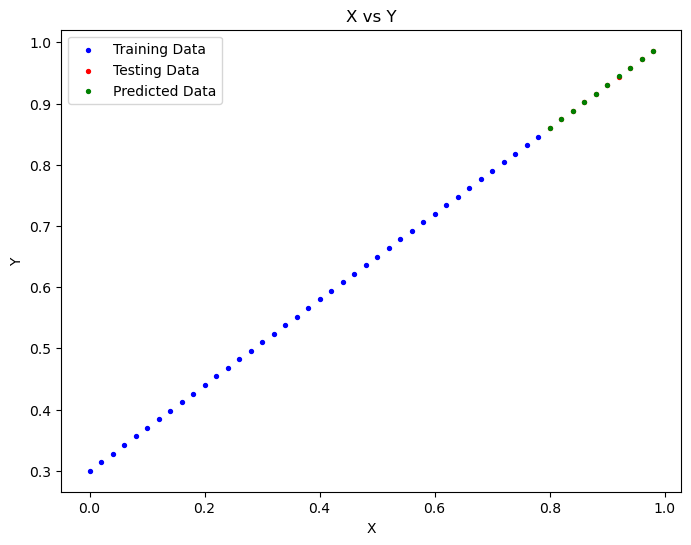

In [44]:
y_out= W * X_test + b
plot_data(predictions=y_out)

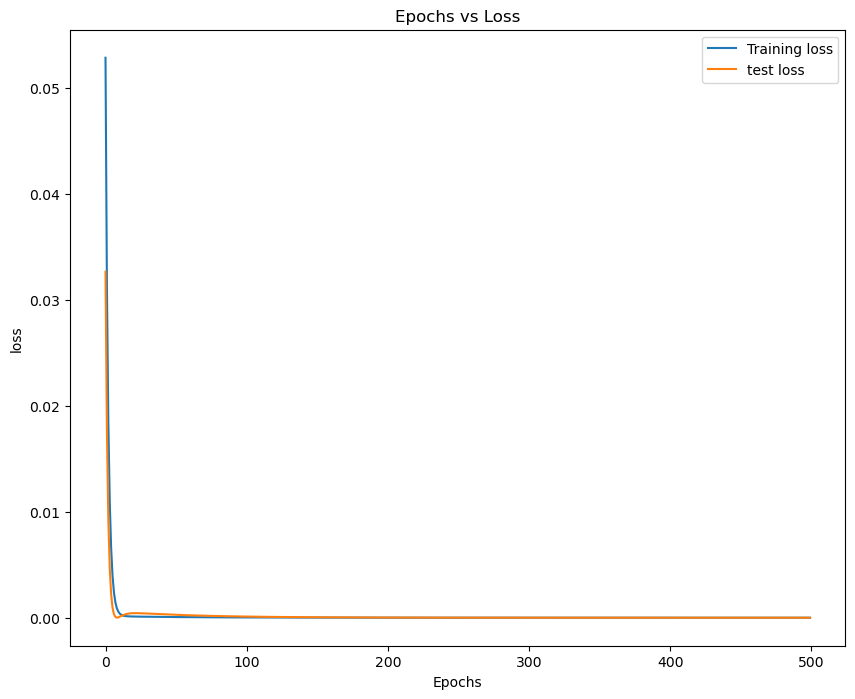

In [45]:
# Plot loss Curve

plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training loss")
plt.plot(range(epochs), testLossList, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epochs vs Loss")
plt.legend()
